<a href="https://colab.research.google.com/github/kasparvonbeelen/uga-llm-workshop/blob/main/1_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 😎 Language Models for the Digitally Curious 🤓

This session explores the use of **language models** to analyse **the historical press** and demonstrates some of the tools we created during the **Living with Machines** project.

It will be interactive, so you can play around with the examples and code snippets yourself, but I will focus on demonstrating stuff (so don't worry if you can't follow the Python fluff).

## What's on the menu?

Main question: how to bring together language models and newspaper data?

- **Approach**: Why the hype?

- **Intro**: What are language models? (vewwwy short!)

- **Pretrained Language Models** (PLMs) as Models of Language: Experiments with historical GPT-2 and BERT models
  - Language models as information compression
  - Using PLMs to investage historical pattern in language, and leverage context
  - Showcase some models created during the Living with Machines project

(Next Notebook)

- **Large Language Models** (LLMs) as Research Assistants? Using instruction-tuned (or "chat" models) for distant reading:
  - "Don't count, summarize?"
  - A simple RAG pipeline to investigate accidents in the news
  - Using LLMs for annotating and structuring newspaper data
  - Correcting OCR?


# Approach: Why the hype?

![](https://i.imgflip.com/76eq2p.jpg)



Especially, since November 2022 we experienced a fastly changing research landscape. [Google Trends](https://trends.google.com/trends/explore?date=today%205-y&q=large%20language%20models,word%20embeddings,topic%20models,language%20models&hl=en)

![lms](https://www.researchgate.net/publication/373451304/figure/fig2/AS:11431281184255542@1693279345418/A-chronological-overview-of-large-language-models-LLMs-multimodal-and-scientific.png)

[Source](https://www.researchgate.net/figure/A-chronological-overview-of-large-language-models-LLMs-multimodal-and-scientific_fig2_373451304)

[Read the paper](https://arxiv.org/abs/2308.14149)

**How to navigate this vast and quickly changing landscape?**

### It's not a battle!

![](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExY2dkaHp3aXNycm4wbHR6cXRteGtjdWljcmI3aG0xb2kxbjJqYzRpMyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/RB0Srigyxd9Ha/giphy.gif)



- Don't get stuck in "hype cycles" or become too attached to one particular model. It's not a fight for the "best" model;
- Explore the wide variety of models at your disposal. Be curious (and adventurous);
- Try to figure out what sticks!
- Admit that often it doesn't actually matter if  you use a model that is a few months old;
- Think about affordances of these models in relation to research data and questions
  - size: sometimes smaller is better
  - open/closed models: can you fine-tune the model etc.
  - costs: you can download a 405B model, but it's unlikely you can run it without spending more $$$.



**One word about size**
![](https://i0.wp.com/blogs.cfainstitute.org/investor/files/2023/05/language-model-size.png?w=900&ssl=1)

**To summarize**: In this session we will explore a wide variety of models, large and small, and investigate how we could use them to analyse historical newspapers.

# Intro: Language Models as Models of Language

## What are language models?

**LMs tell us what word is likely to follow a given sequence.**

More technically:

> “[Language models] assign a probability* to each possible next word. (Jurafsky & Martin)”
- Given a vocabulary *V*, how likely is it that *w* (word) in *V* is follows sequence *s*?

Given the sentence **“Predicting the future is hard, but not …”**

- P(“impossible” | sentence) is greater than P(“aardvark” | sentence)


> Read P(“impossible” | sentence) as the probability of observing the token “impossible” given the sequence “Predicting the future is hard, but not ...


> Probabilities are values between 0 and 1 that sum up to 1.

## How are Language models created?

- **Pre-training** using a language modelling task: iterate over a large collection of text and improve the model's performance on the next token prediction task.
  
  -> In the process the model learns a lot about language, history and (the discursive representations of) the "real" world.
- **Instruction tuning** improves the model so that it follows instructions correctly.

E.g. [Llama-3-8B](https://huggingface.co/meta-llama/Meta-Llama-3-8B) vs. [Llama-3-8B-Instruct](https://huggingface.co/meta-llama/Meta-Llama-3-8B-Instruct)

# Modelling Language: One Token at a Time
## Next word prediction with GPT-2

Next word prediction is the principal building block of generative AI.

In the following example, we generate just one token, to follow a prompt. We will show how a language model produces a probability distribution over the vocabulary from which it can sample the next token.

In [ ]:
%%bash
pip install -q -U transformers accelerate datasets shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.7 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
# import everything
from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Model, pipeline
import numpy as np
import shap
from torch.nn import Softmax
import pandas as pd
softmax = Softmax(dim=0) # initialize softmax function

In [ ]:
# define a prompt
prompt = 'Hello my name is'
# prompt = 'Predicting the future is hard, but not'

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

<Axes: >

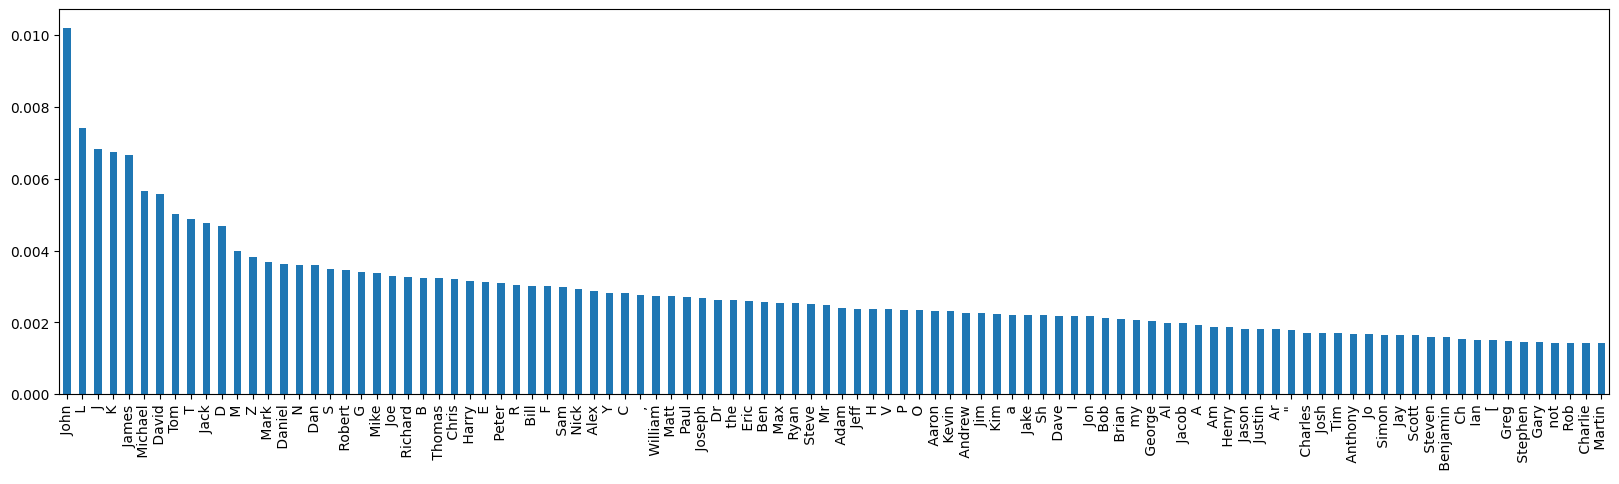

In [ ]:
# tokenizer will split a text in units the LM is built on
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
# add the EOS token as PAD token to avoid warnings
model = GPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)
# load the gpt-2 model
gpt2 = GPT2Model.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)
# get logits from model
predictions = model(**tokenizer(prompt, return_tensors='pt'))
# the predictions as logits
# predictions.logits.shape
# get words with highest probability
tokenizer.decode(np.argmax(predictions.logits[0,-1,:].detach().numpy()))
# order predictions
series = pd.Series(softmax(predictions.logits[0,-1,:]).detach()).sort_values(ascending=False)
# change token_ids to the actual tokens
index = [tokenizer.decode(x) for x in series.index]
# set tokens as index
series.index = index
# plot results
series[:100].plot(kind='bar',figsize=(20,5))

# From predicting the next token to generating complete documents

To generate longer text we repeat the next token prediction multiple times until we encounter a stop symbol (or the limit of tokens to generate).

Text generation involves the following steps:

- Create a probability distribution over the next token
- Sample a token based on this distribution*
- Add the sampled token to the input sequence, and repeat...


* we have a few tricks up our sleeves here: we can manipulate the sampling procedure using specific hyperparameters, such as `temperature`, `top_k`, `top_p`

#### An example of temperature
Increasing the temperature can make predictions more creative (or random if you [like](https://medium.com/mlearning-ai/softmax-temperature-5492e4007f71#:~:text=Temperature%20is%20a%20hyperparameter%20of%20LSTMs%20(and%20neural%20networks%20generally,utilize%20the%20Softmax%20decision%20layer.)))

![temperature](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*7xj72SjtNHvCMQlV.jpeg)

Image taken for this [blog post](https://medium.com/mlearning-ai/softmax-temperature-5492e4007f71#:~:text=Temperature%20is%20a%20hyperparameter%20of%20LSTMs%20(and%20neural%20networks%20generally,utilize%20the%20Softmax%20decision%20layer.) on temperature in Softmax.

The generation steps outlined above are neatly integrated in the Hugging Face 'text-generation' `pipeline`.

First we instantiate the `pipeline` using the GPT2 model, the predecessor the now famous GPT3.

In [ ]:
tokenizer_gpt2 = GPT2Tokenizer.from_pretrained("gpt2")
generator_gpt2 = pipeline('text-generation', # define the task
                     model = 'gpt2', # define the model
                     pad_token_id=tokenizer.eos_token_id # set pad_token_id
                          )


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Then we have to define a prompt (or input text) for which we want to predict the next token.

In [ ]:
# create a prompt
prompt = 'Predicting the future is hard, but not' # 'Hello, my name is'

Lastly, we can generate a few texts to follow the given prompt. We limit the length of these completions to 30 tokens. We use a low temperature so things won't get too weird!

In [ ]:
# generate 3 completions of maximum 30 tokens long
completions = generator_gpt2(prompt,
            temperature=0.1, # increase temperature for more create generations
            max_length = 30,  # max length of each generated text
            num_return_sequences=3, # how many texts to generate
            truncation=True
         )
completions

[{'generated_text': 'Predicting the future is hard, but not impossible.\n\nThe first step is to understand the current state of the economy. The U.'},
 {'generated_text': 'Predicting the future is hard, but not impossible.\n\nThe most important thing to remember is that the future is not a fixed time.'},
 {'generated_text': 'Predicting the future is hard, but not impossible.\n\nThe most important thing to remember is that the future is not a fixed, fixed'}]

# Models ❤️ Data



- **Models "mimic" or "parrot" the data they are trained on.** Some scholars argue they should be referred to as **"corpus models"** instead of "language models". See for example the [Stochastic Parrots paper](https://dl.acm.org/doi/10.1145/3442188.3445922). In this context, language models are understood to be **"compression of data"**, as their weights encode important patterns in the data. In this sense, language models can be used to investigate complex patterns and regularities in language, which I think is of interest to scholars in the digital humanities.
- **Different training data results in different model (outputs).** We can compare models trained in different data to study how language changes over time or by context. In these scenarios, the language models themselves are valuable objects of study, especially when combined with tools/methods that allow us to **interpret** the behaviour of these models.
- Below we have a closer look at some examples. First, we compare the vanilla GPT2 models to one fine-tuned newspaper articles from the [Heritage Made Digital collection](https://blogs.bl.uk/thenewsroom/2019/01/heritage-made-digital-the-newspapers.html), and a selection of [Queer 80s literature](https://www.london.ac.uk/about/services/senate-house-library/exhibitions/seized-books).

If you want more after this session, please consult this wonderful programming historian [tutorial](https://programminghistorian.org/en/lessons/interrogating-national-narrative-gpt))

# Working with Pretrained Language Models

Okay, let's start exploring some language models. We need to import some required tools and libraries.

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import shap # we use this tool to visualize model prediction

## Investigating text generations

**Exercise**:

In the code snippet below:
- change the `model_checkpoint` variable to load a different model
- change to `prompt` to generate different texts
- optional: change the `temperature` argument

In [ ]:
# select a model
# replace gpt2 with either
# 'Kaspar/gpt-finetuned-newspapers-hmd' or 'Kaspar/QueerGPT2'
model_checkpoint = 'Kaspar/gpt-finetuned-newspapers-hmd' # 'gpt2' 'Kaspar/gpt-finetuned-newspapers-hmd' 'Kaspar/QueerGPT2'
# initialize the tokenizer
tokenizer_gpt2 = GPT2Tokenizer.from_pretrained(model_checkpoint)
# initialize a text generation pipeline
generator_gpt2 = pipeline('text-generation', # define the task
                     model = model_checkpoint, # define the model
                     pad_token_id=tokenizer.eos_token_id, # set pad_token_id
                     truncation=True
                          )
# writ a prompt
prompt = 'In January 1849' # 'Hello, my name is'
# generate text
completions = generator_gpt2(prompt,
            temperature=0.1, # increase temperature for more create generations
            max_length = 30,  # max length of each generated text
            num_return_sequences=3 # how many texts to generate
         )

for c in completions:
  print(c['generated_text'])

tokenizer_config.json:   0%|          | 0.00/640 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/237 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/924 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

In January 1849, the Hon. and Learned Gentleman, in his speech on the subject of the Corn-laws, said that the Corn-laws
In January 1849, the Rev. Mr. W. H. H. Smith, of the Royal College of Surgeons, was appointed to the
In January 1849, the Hon. and Learned Gentleman, in his speech on the subject of the Corn-laws, said that the Corn-laws


## Interpreting model predictions with shap

We load the different language models: `gpt2`, `QueerGPT2` and `gpt-hmd`.

In [ ]:
explainer_dict = {}

for checkpoint in  ['gpt2','Kaspar/gpt-finetuned-newspapers-hmd','Kaspar/QueerGPT2']:
  tokenizer = AutoTokenizer.from_pretrained('gpt2', use_fast=True)
  model = AutoModelForCausalLM.from_pretrained(checkpoint)
  wrapped_model = shap.models.TopKLM(model, tokenizer, k=25)
  masker = shap.maskers.Text(tokenizer, mask_token="...", collapse_mask_token=True)
  explainer = shap.Explainer(wrapped_model, masker)
  explainer_dict[checkpoint] = explainer

config.json:   0%|          | 0.00/907 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

The `shap` library nicely visualises which parts of the input segment influence the prediction of the next token.

**Exercise**

Change the prompt and look at how the predictions differ in relation to the input text.

In [ ]:
prompt = "First I went to walk the dog, then I had breakfast, now I will go to the" # change the prompt
expl = 'gpt2'
shap_values = explainer_dict[expl]([prompt])
shap.plots.text(shap_values)

  0%|          | 0/342 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:49, 49.88s/it]               


In [ ]:
prompt = "" # change the prompt
expl = ""# change the model to 'Kaspar/gpt-finetuned-newspapers-hmd'
shap_values = explainer_dict[expl]([prompt])
shap.plots.text(shap_values)

Importantly, if we fine-tune the model on different data, it gains novel knowledge and will change its behaviour and predictions.

In [ ]:
prompt = "When I grow up, I want to become a" # change the prompt
expl = "gpt2" # gpt2 | Kaspar/QueerGPT2 | Kaspar/gpt-finetuned-newspapers-hmd
shap_values = explainer_dict[expl]([prompt])
shap.plots.text(shap_values)

  0%|          | 0/90 [00:00<?, ?it/s]

In [ ]:
# play with the prompt and the model
prompt = "" # change the prompt
expl = "" # 'Kaspar/QueerGPT2' | gpt2
shap_values = explainer_dict[expl]([prompt])
shap.plots.text(shap_values)

In [ ]:
# Lastly, we can generate longer outputs and assess how these related to input tokens.
# prompt = "In January 1848, the revolution" # change the prompt
# checkpoint = 'Kaspar/gpt-finetuned-newspapers-hmd' #  choose gpt2 or Kaspar/QueerGPT2
# tokenizer = AutoTokenizer.from_pretrained('gpt2')
# model = AutoModelForCausalLM.from_pretrained(checkpoint)
# # set model decoder to true
# model.config.is_decoder = True
# # set text-generation params under task_specific_params
# model.config.task_specific_params["text-generation"] = {
#     "do_sample": True,
#     "max_length": 400,
#     "temperature": 0.2,
#     "top_k": 100,
#     #"no_repeat_ngram_size": 2,
# }
# explainer = shap.Explainer(model, tokenizer)
# shap_values = explainer([prompt])

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


  0%|          | 0/42 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:10, 10.72s/it]               


In [ ]:
# shap.plots.text(shap_values)

# Historical Language Models



## BLERT

As you've noticed in the previous examples, comparing model predictions allows us to study linguistic and societal changes.

**These predictions can give us insight in linguistic patterns and can be a way of investigating language at scale.**

In the Living with Machines project, we investigated the concept of atypical animacy, focussed on the portrayal of machines as being 'alive'.

For example:
> "The little howling- machine had waked up !"

You can read the technical paper [here](https://arxiv.org/abs/2005.11140) and the historical article [here](https://muse.jhu.edu/pub/1/article/903976/summary).

(In these papers, we used a slightly different technique and type of model, namely autoencoding/masked language models (as opposed to the GPT-series which resort under the category of autoregressive/causal models).  But please ignore this distinction for now.)

We masked the word 'machine' as in:

> "The little howling-[MASK] had waked up !"

... and investigated what the model predicts, focussing on examples where it predicts humans or animals instead of mechanical objects.

For this example, the model predicted the following for the [MASK] token.

```python
[{'score': 0.2068408727645874,
  'token': 3899,
  'token_str': 'dog',
  'sequence': 'the little howling - dog had waked up!'},
 {'score': 0.09967557340860367,
  'token': 4937,
  'token_str': 'cat',
  'sequence': 'the little howling - cat had waked up!'},
 {'score': 0.07419851422309875,
  'token': 4702,
  'token_str': 'wolf',
  'sequence': 'the little howling - wolf had waked up!'},
 {'score': 0.05852370336651802,
  'token': 2611,
  'token_str': 'girl',
  'sequence': 'the little howling - girl had waked up!'},
 {'score': 0.03520471975207329,
  'token': 13547,
  'token_str': 'owl',
  'sequence': 'the little howling - owl had waked up!'}]
```

Moreover, we used **historical language models**, to study how these predictions change by period.

We fine-tuned BLERT, a [BERT](https://huggingface.co/google-bert/bert-base-uncased) model on 19th-century BL books collections as described in [our paper](https://openhumanitiesdata.metajnl.com/articles/10.5334/johd.48).

In [ ]:
from transformers import pipeline
sentence = "Our sewing [MASK] stood near the wall where grated windows admitted sunshine, and their hymn to Labour was the only sound that broke the brooding silence."

In [ ]:
masker = pipeline("fill-mask", model='bert-base-uncased')
masker(sentence)

In [ ]:
victorian_masker = pipeline("fill-mask", model='Livingwithmachines/bert_1760_1850')
victorian_masker(sentence)

If you are interested in BLERT trained on **all** 19th century books, you can find it here.

In [ ]:
blert_masker = pipeline("fill-mask", model='Livingwithmachines/bert_1760_1900')
blert_masker(sentence)

**Exercise**

Can you think of another example where we might observe interesting historical differences? Change the sentence variable with another "[MASK]" token.

## Newspaper Language Models Trained with MDMA*
*(MetaData Masking Approach).


Usually, we train language models on just the text. We present the model with a sentences with masked tokens.

> Example: "Our sewing [MASK] stood near the wall."

In the process, the model learns associations between words, i.e. what words are likely to appear in which context.

However, we often know quite a lot about the text that could be important for this task. For example, knowing the year when this sentences might help producing more accurate predictions:

> Example: "1870 [DATE] The war between France and [MASK] took them by surprise."


You can read the paper [here](https://arxiv.org/pdf/2211.10086).

## Learning simutaneously from text and context

In other words: text and context are related, what would happen if we train a model learns a relation between both? Not just predict masked token, but also what year a text was published?

ERWT (Dutch for 'pea') is a series of **experimental models** trained on newspaper content and metadata (mainly year, place and politics). We used the Heritage Made Digital newspapers and the Mitchell's metadata.

These are experimental models because we created them primarily for **evaluation purposes**, i.e. to undestand *how* to train these models. The remain undertrained, and unreliable, but can be used for demo-purposes as we do here.


In [ ]:
from transformers import pipeline
erwt_masker = pipeline("fill-mask", model='Livingwithmachines/erwt-year')

In [ ]:
erwt_masker('1820 [DATE] We received a letter from [MASK] Majesty.')

**Question**: What would happen if we change the year to 1850?

ERWT models also predict the year based on text.

**Exercise**

Apply the `erwt_masker` to the sentences below.



In [ ]:
'[MASK] [DATE] The Franco-Prussian war is a matter of great concern.'
'[MASK] [DATE] The Schleswig war is a matter of great concern.'

# Fin.